## Feature Importance and Feature Selection Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read Leads info

In [2]:
leads = pd.read_csv("Leads_Training.csv")
leads.head(5)

C:\Users\david.rodriguez\AppData\Local\Temp\ipykernel_12372\828412929.py:1: DtypeWarning: Columns (17,45) have mixed types. Specify dtype option on import or set low_memory=False.
  leads = pd.read_csv("Leads_Training.csv")


,Employees,Pardot Score,ZI IT Department Budget,Converted Date,Converted Date (Month),Created Date,Created Date (Month),Lead Assigned Date,Lead Assigned Date (Month),MQL Date,...,Last Activity,Last Modified Date,Pardot Last Activity,SQL Date,Account Engagement Campaign,Assign to RSD,Division,Department,Marketing Status,Partner Business Model Type
0,0,0,0.0,11/4/2020,11.0,11/3/2020,11,NaN,NaN,NaN,...,NaN,2024-04-25T14:17:24.000Z,NaN,NaN,Website Tracking,False,NaN,Sales,NaN,Reseller
1,0,358,0.0,12/28/2020,12.0,12/16/2020,12,NaN,NaN,12/16/2020,...,NaN,2024-04-25T14:17:00.000Z,2020-12-28T22:05:07.000Z,NaN,Default Campaign,False,NaN,Sales,NaN,NaN
2,0,25,0.0,7/2/2021,7.0,6/22/2021,6,NaN,NaN,NaN,...,NaN,2024-04-25T14:17:13.000Z,NaN,NaN,Website Tracking,False,NaN,Sales,NaN,NaN
3,0,0,0.0,9/8/2021,9.0,8/31/2021,8,NaN,NaN,NaN,...,NaN,2023-12-13T20:58:59.000Z,NaN,NaN,Created within Salesforce - Prio 3,False,NaN,NaN,NaN,Reseller
4,0,105,0.0,9/13/2021,9.0,8/12/2020,8,NaN,NaN,8/11/2020,...,NaN,2024-04-25T14:16:01.000Z,NaN,NaN,AG: TFP LATAM Demo Series DTP Aug 18th,False,NaN,Sales,NaN,NaN


In [3]:
leads.shape

(290669, 49)

## Counting NA

In [4]:
leads.isna().sum()

Employees                                     0
Pardot Score                                  0
ZI IT Department Budget                       0
Converted Date                           278568
Converted Date (Month)                   278568
Created Date                                  0
Created Date (Month)                          0
Lead Assigned Date                       139838
Lead Assigned Date (Month)               139838
MQL Date                                 268149
Account Name                              83604
Active                                    83604
City                                      92329
Country                                   53980
Converted Opportunity ID                 287726
Converted                                     0
Converted Contact ID                     278610
Deal Type                                290646
Deleted                                       0
Industry                                 111912
Lead Source                             

In [5]:
leads = leads[~leads["Owner Name"].isna()]

In [6]:
leads['Converted'] = np.where(leads['Converted'] == True,1,0)
leads['Assigned'] = np.where(leads['Calculated Lead Assigned Date'].isna(),0,1)
leads['Converted Opportunity ID'] = np.where(leads['Converted Opportunity ID'].isna(),0,1)
leads['MQL'] = np.where(leads['MQL Date'].isna(),0,1)
leads['City'] = np.where(leads['City'].isna(),"Not info",leads['City'])
leads['Country'] = np.where(leads['Country'].isna(),"Not info",leads['Country'])
leads['Converted Contact ID'] = np.where(leads['Converted Contact ID'].isna(),0,1)

leads.groupby('Assigned')['Assigned'].count()

Assigned
0    158908
1     93718
Name: Assigned, dtype: int64

In [7]:
leads.isna().sum()

Employees                                     0
Pardot Score                                  0
ZI IT Department Budget                       0
Converted Date                           240940
Converted Date (Month)                   240940
Created Date                                  0
Created Date (Month)                          0
Lead Assigned Date                       110281
Lead Assigned Date (Month)               110281
MQL Date                                 234534
Account Name                              62462
Active                                    62462
City                                          0
Country                                       0
Converted Opportunity ID                      0
Converted                                     0
Converted Contact ID                          0
Deal Type                                252611
Deleted                                       0
Industry                                  88317
Lead Source                             

## Dates Fromating

In [8]:
leads['Converted Date']= pd.to_datetime(leads['Converted Date'])
leads['Created Date'] = pd.to_datetime(leads['Created Date'])
leads['Lead Assigned Date'] = pd.to_datetime(leads['Lead Assigned Date'])
leads['Calculated Lead Assigned Date'] = pd.to_datetime(leads['Calculated Lead Assigned Date'])
leads['Last Activity'] = pd.to_datetime(leads['Last Activity'])
leads['Last Modified Date'] = pd.to_datetime(leads['Last Modified Date'])
leads['Last Modified Date'] = leads['Last Modified Date'].dt.tz_localize(None)

## Calculating Time for some Activities

In [9]:
leads['Converted Time'] = np.where(leads['Converted'] == 1,(leads['Converted Date'] - leads['Created Date']).dt.days,(pd.Timestamp.today() - leads['Created Date']).dt.days)
leads['Last Activity'] = np.where(leads['Last Activity'].isna(),(pd.Timestamp.today() - leads['Created Date']).dt.days,(leads['Last Activity'] - leads['Created Date']).dt.days)
leads['Last Modified Date'] = np.where(leads['Last Modified Date'].isna(),(pd.Timestamp.today() - leads['Created Date']).dt.days,(leads['Last Modified Date'] - leads['Created Date']).dt.days)

In [ ]:
leads.drop(columns =['Converted Date','Lead Assigned Date','Converted Date (Month)',
                     'MQL Date','Deal Type','Converted Contact ID','Calculated Lead Assigned Date',
                     'Lead Status','Salutation','Partner',"Stage",'SQL Date'], inplace = True)

In [11]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252626 entries, 0 to 290668
Data columns (total 41 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Employees                              252626 non-null  int64         
 1   Pardot Score                           252626 non-null  int64         
 2   ZI IT Department Budget                252626 non-null  float64       
 3   Created Date                           252626 non-null  datetime64[ns]
 4   Created Date (Month)                   252626 non-null  int64         
 5   Lead Assigned Date (Month)             142345 non-null  float64       
 6   Account Name                           190164 non-null  object        
 7   Active                                 190164 non-null  object        
 8   City                                   252626 non-null  object        
 9   Country                                252626 non-nul

In [12]:
leads.shape

(252626, 41)

In [13]:
leads.drop(columns=['ZI IT Department Budget','Deleted','Lead Assigned Date (Month)','Rows','Calculated Lead Assigned Date (Month)'], inplace = True)

In [14]:
leads.corr(numeric_only=True).style.background_gradient(cmap="RdYlGn")

,Employees,Pardot Score,Created Date (Month),Converted Opportunity ID,Converted,Last Activity,Last Modified Date,Assign to RSD,Assigned,MQL,Converted Time
Employees,1.000000,-0.040457,0.007408,-0.026739,-0.038334,0.088333,0.122704,-0.013664,0.015862,-0.032834,0.126009
Pardot Score,-0.040457,1.000000,0.033402,0.033265,0.105230,0.067768,0.007042,0.032022,-0.023654,0.373702,-0.027254
Created Date (Month),0.007408,0.033402,1.000000,-0.004291,0.008532,0.265012,0.142242,-0.028929,-0.027722,0.034612,0.142406
Converted Opportunity ID,-0.026739,0.033265,-0.004291,1.000000,0.487520,0.084425,-0.007582,-0.006935,0.062453,0.041338,-0.193505
Converted,-0.038334,0.105230,0.008532,0.487520,1.000000,0.207457,0.015950,-0.001714,0.056521,0.093706,-0.278778
Last Activity,0.088333,0.067768,0.265012,0.084425,0.207457,1.000000,0.435452,0.040581,0.070818,0.106162,0.327237
Last Modified Date,0.122704,0.007042,0.142242,-0.007582,0.015950,0.435452,1.000000,0.012477,0.057044,0.225827,0.923762
Assign to RSD,-0.013664,0.032022,-0.028929,-0.006935,-0.001714,0.040581,0.012477,1.000000,-0.005101,0.047411,0.014261
Assigned,0.015862,-0.023654,-0.027722,0.062453,0.056521,0.070818,0.057044,-0.005101,1.000000,-0.071240,-0.026537
MQL,-0.032834,0.373702,0.034612,0.041338,0.093706,0.106162,0.225827,0.047411,-0.071240,1.000000,0.180104


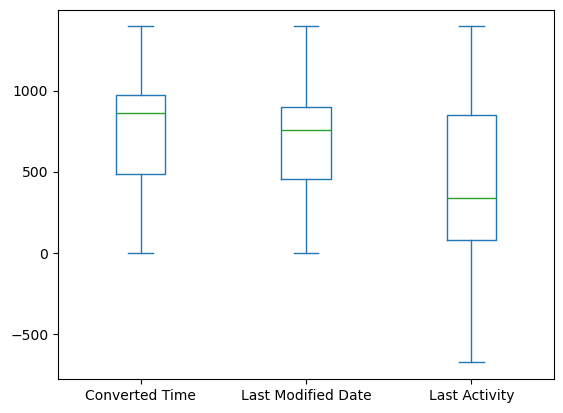

In [15]:
outliers_check = ["Converted Time",'Last Modified Date','Last Activity']

leads[outliers_check].plot.box()
plt.show()

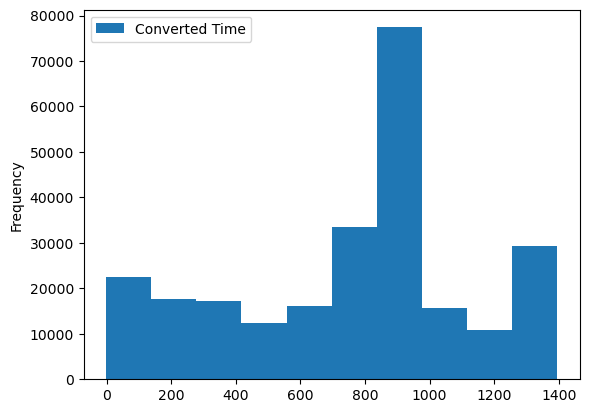

In [16]:
outliers_check = ['Converted Time']

leads[outliers_check].plot.hist()
plt.show()

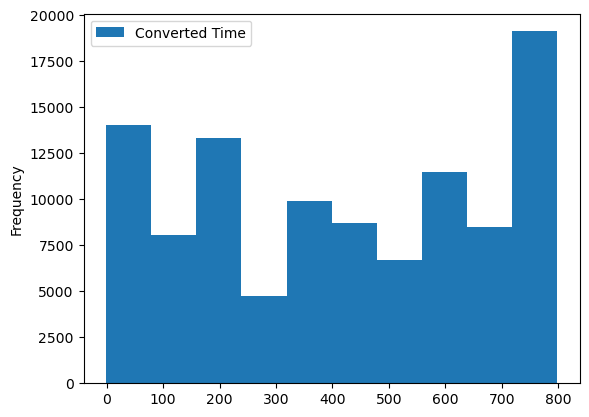

In [17]:
## Delete migrated Leads
leads = leads[leads['Created Date']>=pd.Timestamp('2022-01-01')]
leads.drop(columns =['Created Date'], inplace = True)
leads[outliers_check].plot.hist()
plt.show()

In [18]:
outliers_labels = [
    'Converted Time'
]

test_outliers = leads[outliers_labels].copy()
for col in outliers_labels:
    q1 = np.quantile(test_outliers[col], 0.25)
    q3 = np.quantile(test_outliers[col], 0.75)
    iqr = q3 - q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    test_outliers = test_outliers[(test_outliers[col] >= minimum) & (test_outliers[col] <= maximum)]
 
print(leads.shape[0] - test_outliers.shape[0])

0


In [19]:
leads.groupby('Converted').count()

,Employees,Pardot Score,Created Date (Month),Account Name,Active,City,Country,Converted Opportunity ID,Industry,Lead Source,...,SQL Date,Account Engagement Campaign,Assign to RSD,Division,Department,Marketing Status,Partner Business Model Type,Assigned,MQL,Converted Time
Converted,,,,,,,,,,,,,,,,,,,,,
0,99647,99647,99647,61264,61264,99647,99647,99647,41530,98674,...,8,99647,99647,0,90108,0,571,99647,99647,99647
1,4823,4823,4823,3733,3733,4823,4823,4823,1676,4760,...,11,4823,4823,0,4715,0,1216,4823,4823,4823


In [20]:
converted = leads[leads["Converted"] == 1]['Converted'].count()
converted

4823

In [21]:
#leads_no_converted = leads[leads["Converted"] == 0].sample(converted)
#leads_converted = leads[leads["Converted"] == 1]

#leads = pd.concat([leads_converted, leads_no_converted], ignore_index=True)
#leads.shape

In [22]:
leads.groupby('Converted').count()

,Employees,Pardot Score,Created Date (Month),Account Name,Active,City,Country,Converted Opportunity ID,Industry,Lead Source,...,SQL Date,Account Engagement Campaign,Assign to RSD,Division,Department,Marketing Status,Partner Business Model Type,Assigned,MQL,Converted Time
Converted,,,,,,,,,,,,,,,,,,,,,
0,99647,99647,99647,61264,61264,99647,99647,99647,41530,98674,...,8,99647,99647,0,90108,0,571,99647,99647,99647
1,4823,4823,4823,3733,3733,4823,4823,4823,1676,4760,...,11,4823,4823,0,4715,0,1216,4823,4823,4823


In [23]:
#leads.drop(columns=["Name","Lead Name","Lead ID","Lead Status","Owner Name","Converted Date (Quarter)",
#                    "Converted Date (Month)","Created Date (Quarter)","Lead Assigned Date (Quarter)",
#                    "Lead Priority Date (Quarter)","Priority Date (Quarter)","RFS Date/Time (Quarter)",
#                    "SAL Date (Quarter)","SQL Date (Quarter)","Current Priority Date/Time (Quarter)"], inplace= True)
#leads.isna().sum()

In [24]:
for column in leads.columns:
    if leads[column].dtype == "object":
         leads[column] = leads[column].astype('category')
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104470 entries, 15 to 290668
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Employees                    104470 non-null  int64   
 1   Pardot Score                 104470 non-null  int64   
 2   Created Date (Month)         104470 non-null  int64   
 3   Account Name                 64997 non-null   category
 4   Active                       64997 non-null   category
 5   City                         104470 non-null  category
 6   Country                      104470 non-null  category
 7   Converted Opportunity ID     104470 non-null  int32   
 8   Converted                    104470 non-null  int32   
 9   Industry                     43206 non-null   category
 10  Lead Source                  103434 non-null  category
 11  Lead Priority                104459 non-null  category
 12  Name                         104470 non-null  ca

In [25]:
leads.shape

(104470, 35)

In [26]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# read data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [27]:
features = leads.drop(columns = ['Converted','Converted Opportunity ID'])
features.shape

(104470, 33)

In [28]:
target = leads[['Converted']]
target.shape

(104470, 1)

In [29]:
target.shape[0]-features.shape[0]

0

## Training getting Train and test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2)
print(X_train.shape, X_test.shape)

(83576, 33) (20894, 33)


In [31]:
evalset = [(X_train, y_train), (X_test,y_test)]

In [32]:
# create model instance
bst = XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=1, objective='binary:logistic',enable_categorical=True)
print("Ready")

Ready


In [33]:
# fit model
bst.fit(X_train, y_train, eval_metric='auc', eval_set=evalset, early_stopping_rounds=10)
# make predictions
predictions = bst.predict(X_test)
predictions

C:\Users\david.rodriguez\AppData\Local\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\david.rodriguez\AppData\Local\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.90970	validation_1-auc:0.90667
[1]	validation_0-auc:0.99646	validation_1-auc:0.99480
[2]	validation_0-auc:0.99823	validation_1-auc:0.99673
[3]	validation_0-auc:0.99909	validation_1-auc:0.99733
[4]	validation_0-auc:0.99977	validation_1-auc:0.99744
[5]	validation_0-auc:0.99984	validation_1-auc:0.99744
[6]	validation_0-auc:0.99998	validation_1-auc:0.99773
[7]	validation_0-auc:0.99999	validation_1-auc:0.99785
[8]	validation_0-auc:1.00000	validation_1-auc:0.99803
[9]	validation_0-auc:1.00000	validation_1-auc:0.99877
[10]	validation_0-auc:1.00000	validation_1-auc:0.99863
[11]	validation_0-auc:1.00000	validation_1-auc:0.99869
[12]	validation_0-auc:1.00000	validation_1-auc:0.99885
[13]	validation_0-auc:1.00000	validation_1-auc:0.99886
[14]	validation_0-auc:1.00000	validation_1-auc:0.99885
[15]	validation_0-auc:1.00000	validation_1-auc:0.99899
[16]	validation_0-auc:1.00000	validation_1-auc:0.99914
[17]	validation_0-auc:1.00000	validation_1-auc:0.99924
[18]	validation_0-au

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
actual = y_test["Converted"].values
actual

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
len(predictions), len(actual)

(20894, 20894)

In [36]:
score = accuracy_score(y_test, predictions)
score

0.9992342299224658

In [37]:
correct =0
wrong =0
for i in range(len(predictions)):
    if predictions[i] == actual[i]:
        correct += 1
    else:
        wrong += 1
correct, wrong

(20878, 16)

In [38]:
# Accuaracy = Correct/ All Predictions
correct/(correct+ wrong)

0.9992342299224658

In [39]:
# retrieve performance metrics
results = bst.evals_result()

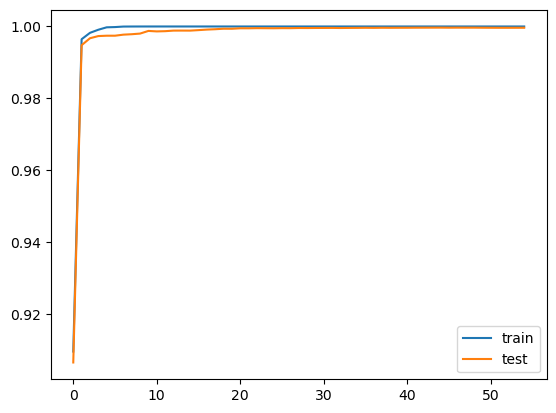

In [40]:
# plot learning curves
plt.plot(results['validation_0']['auc'], label='train')
plt.plot(results['validation_1']['auc'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [41]:
print(bst.feature_importances_)

[6.9752487e-04 1.1981752e-03 1.0341309e-03 5.8733875e-01 1.1807764e-03
 1.6896781e-02 7.0676010e-04 1.6079867e-03 2.1460534e-03 9.5740482e-02
 0.0000000e+00 3.7505683e-03 0.0000000e+00 1.7802250e-03 1.2928228e-02
 7.0891454e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.6630390e-04
 9.4175264e-02 1.3420045e-03 0.0000000e+00 0.0000000e+00 7.4163377e-02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5603048e-03
 1.2411091e-04 0.0000000e+00 9.7453296e-02]


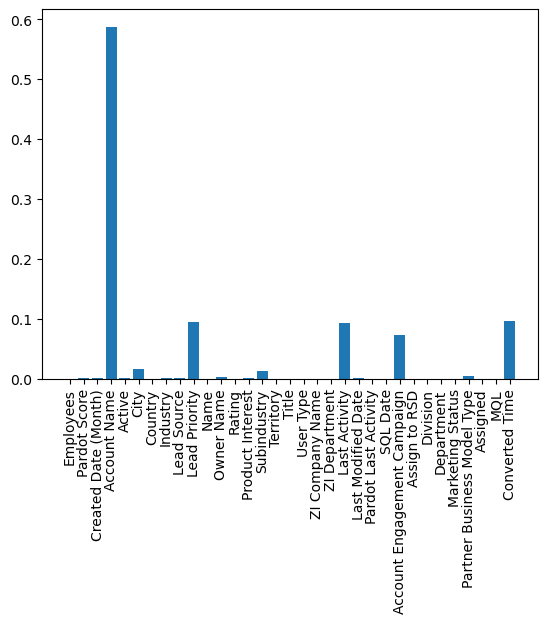

In [42]:
# plot
plt.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
plt.xticks(ticks=range(len(bst.feature_importances_)), labels=features.columns, rotation=90)
plt.show()

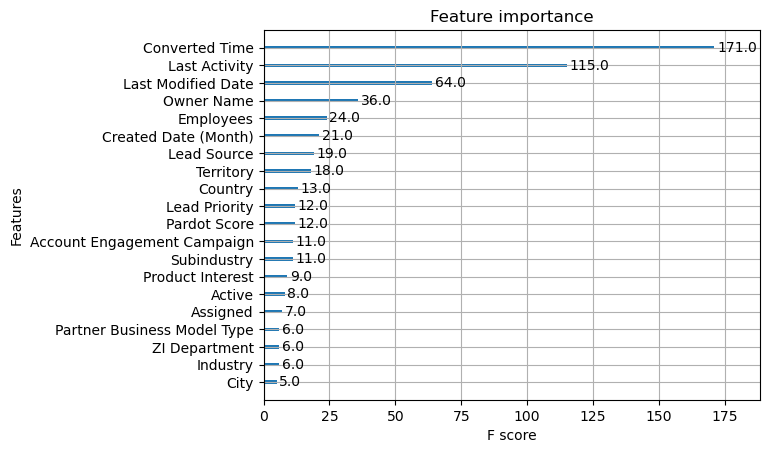

In [43]:
plot_importance(bst, max_num_features=20)
plt.show()

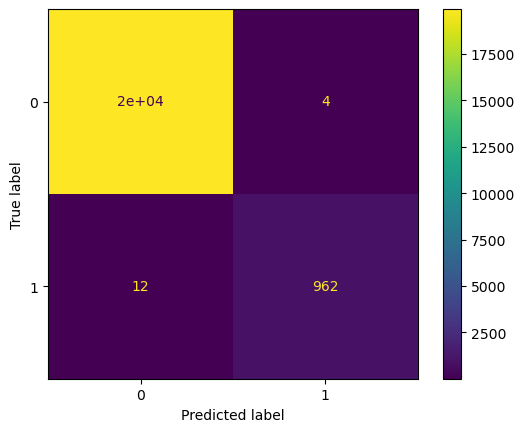

In [44]:
cm = confusion_matrix(y_test, predictions, labels=bst.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bst.classes_)
disp.plot()
# plt.show()

In [45]:
from sklearn.metrics import precision_score

In [46]:
precision = precision_score(y_test, predictions)
print(f'Precision: {precision}')

Precision: 0.9958592132505176
